In [108]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV, KFold

import time

from scipy import stats
from scipy.stats import norm, skew, kurtosis, boxcox #for some statistics
from scipy.special import boxcox1p, inv_boxcox, inv_boxcox1p

from xgboost import XGBClassifier

In [109]:
class MyTimer():
    # usage:
    #with MyTimer():                            
    #    rf.fit(X_train, y_train)
    
    def __init__(self):
        self.start = time.time()
    def __enter__(self):
        return self
    def __exit__(self, exc_type, exc_val, exc_tb):
        end = time.time()
        runtime = end - self.start
        msg = 'The function took {time} seconds to complete'
        print(msg.format(time=runtime))

In [110]:
def ImputeData(all_data, numerical_input, col_to_impute):
    Missing = all_data[numerical_input]
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    imputer.fit(Missing)
    Xtrans = imputer.transform(Missing)
    df_miss = pd.DataFrame(Xtrans,columns = Missing.columns)
    all_data[col_to_impute] = df_miss[col_to_impute]
    return (all_data)

In [111]:
train = pd.read_csv('Input//train.csv')
test = pd.read_csv('Input//test.csv')

In [112]:
object_feats = [x for x in train.dtypes[train.dtypes == "object"].index]
features_to_del = []
for x in object_feats:
    if train[x].nunique() > 10:
        features_to_del.append(x)
for x in features_to_del:
    object_feats.remove(x)

<ipython-input-132-d6f4110e4bfc>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


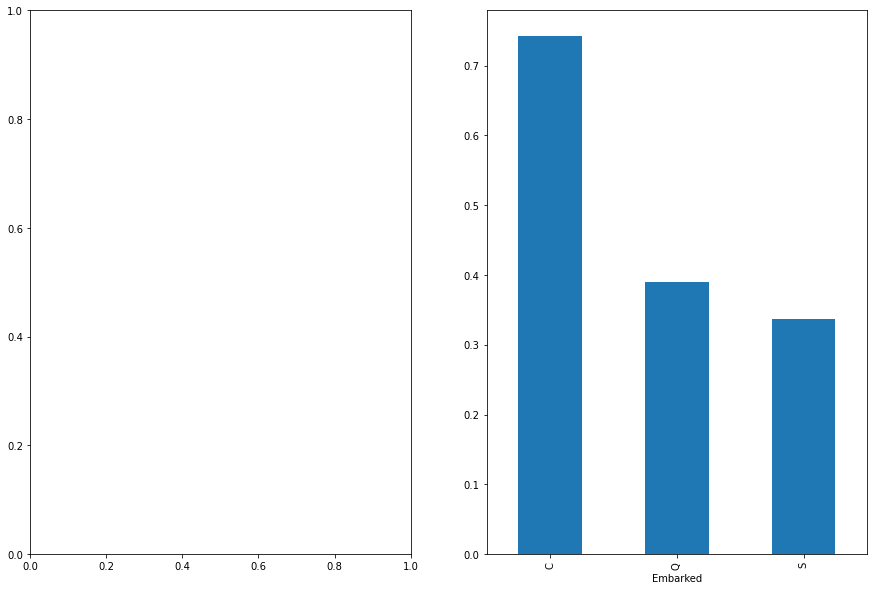

In [132]:
fig, axes = plt.subplots(nrows = int(round(len(object_feats)/2)), ncols = 2,figsize=(15, 10))
for i, feature in enumerate(object_feats):
    axes[int(i/2)+ (i%2)] = train.groupby(feature)['Survived'].mean().plot.bar()